#  IMDB Rating Analysis

## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly # visualize 
import plotly.graph_objects as go # advance visualize 
import plotly.express as px # visualize 
plotly.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("C:\\Users\\TAMANNA\\Downloads\\archive (3)\\imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
df.shape

(1000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [7]:
df.dropna(inplace=True)
df.shape

(714, 16)

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(714, 16)

## 1.Unique Genre

In [9]:
c1 = df.groupby('Genre',as_index=False)['IMDB_Rating'].mean()
c1

,Genre,IMDB_Rating
0,"Action, Adventure",8.180000
1,"Action, Adventure, Comedy",7.828571
2,"Action, Adventure, Drama",8.225000
3,"Action, Adventure, Family",7.600000
4,"Action, Adventure, Fantasy",8.200000
...,...,...
167,"Horror, Thriller",7.700000
168,"Mystery, Romance, Thriller",8.300000
169,"Mystery, Sci-Fi, Thriller",7.800000
170,"Mystery, Thriller",8.150000


## 2. Movie with maximum rating 

In [10]:
df[(df.IMDB_Rating==df.IMDB_Rating.max())]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


## 3. Top 5 Genre with maximum rating 

In [11]:
index = df['IMDB_Rating'].sort_values(ascending=False).head().index
df.iloc[index]['Genre']

0                   Drama
1            Crime, Drama
2    Action, Crime, Drama
3            Crime, Drama
4            Crime, Drama
Name: Genre, dtype: object

## 4. Released movies in recent 10 years  

<AxesSubplot:>

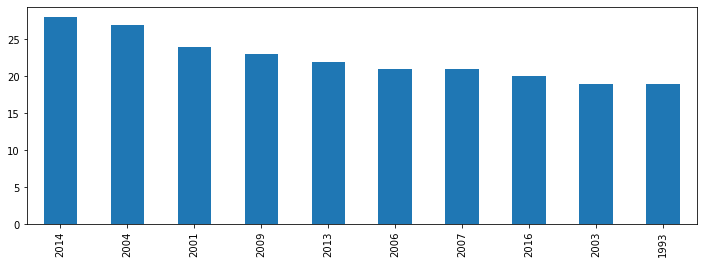

In [12]:
df['Released_Year'].value_counts().head(10).plot.bar(figsize=(12,4))

## 5. Top 10 Directors with maximum movies

<AxesSubplot:ylabel='Director'>

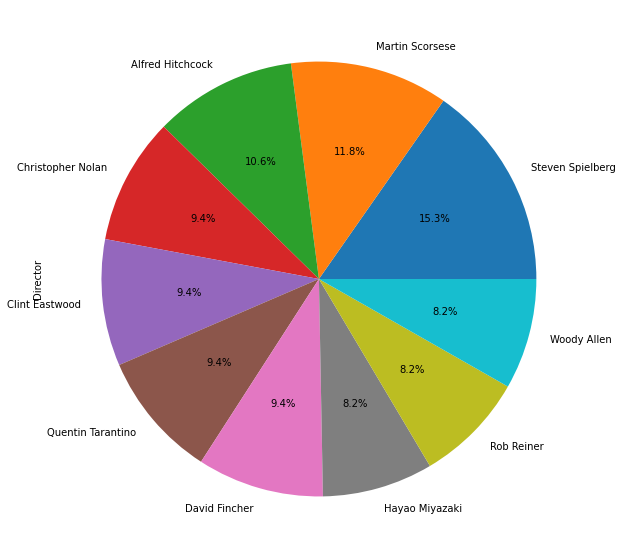

In [13]:
df.Director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))

## 6. Meta Score Distribution

(array([  6.,  37., 164., 317., 190.]),
 array([ 28. ,  42.4,  56.8,  71.2,  85.6, 100. ]),
 <BarContainer object of 5 artists>)

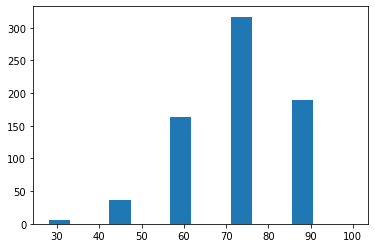

In [14]:
plt.hist(df.Meta_score,bins=5,width=5)

## 7. Analysis using Rating 

In [15]:
# analysis based on rating
labels=["7.7-8","8-8.5","8.5-9","9.5-10"]
values=[
       (df["IMDB_Rating"]<8).sum(),
       (df["IMDB_Rating"]<8.5).sum(),
       (df["IMDB_Rating"]<9).sum(),
       (df["IMDB_Rating"]<9.5).sum()]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.2)])
fig.update_traces(hoverinfo="label+value+percent",textinfo="value",textfont_size=15,
                 marker=dict(line=dict(color="black",width=3)))
fig.update_layout(title="No. of Apps based on their Rating",titlefont={"size":30})
fig.show()